<a href="https://colab.research.google.com/github/Joshua1030/APS360_Team17/blob/main/Baseline_model_chenjun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Data Loading and Splitting
Download data from kaggle and split them into train, validation, and test sets. Data are downloded from https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification

Since the dataset contains about 10,000 images over 6 categories, it will take very long to train our model. Our team decide to randomly choose 500 images for training, 100 images for validation, and 100 images for testing, from each category. 
Datasets can be downloaded by link: https://drive.google.com/drive/folders/1vMEit7Gcn2ZQd1DnRtb2J6Gn7FbUQP4T?usp=share_link

In [3]:
#import libraries
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#make sure to use the correct address
#Joshua
train_dir = "/content/gdrive/MyDrive/APS360/Project_data_set/APS360_Data_Small_Train"
val_dir = "/content/gdrive/MyDrive/APS360/Project_data_set/APS360_Data_Small_Val"
test_dir = "/content/gdrive/MyDrive/APS360/Project_data_set/APS360_Data_Small_Test"

In [6]:
#data are downloded from https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
classes = ('freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges')

#resize all images to 224x224
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

trainset = torchvision.datasets.ImageFolder(train_dir, transform=transform)
valset = torchvision.datasets.ImageFolder(val_dir, transform=transform)
testset = torchvision.datasets.ImageFolder(test_dir, transform=transform)


#data loader
batch_size = 16

train_loader = torch.utils.data.DataLoader(trainset, batch_size, num_workers=1, shuffle=True)
val_loader = torch.utils.data.DataLoader(valset, batch_size, num_workers=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size, num_workers=1, shuffle=True)

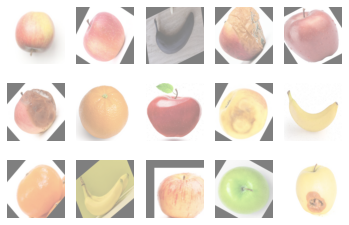

In [7]:
#Visualize data
k = 0
for images, labels in val_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    #print(labels)
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

Baseline Model

In [15]:
def get_accuracy(net, loader):
    correct = 0
    total = 0
    for inputs, labels in loader:
        
        #if use_cuda and torch.cuda.is_available():
            #inputs = inputs.cuda()
            #labels = labels.cuda()

        output = net(inputs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += inputs.shape[0]
    return correct / total

In [14]:
def train(net, train_loader=train_loader, val_loader=val_loader, batch_size=128, num_epochs=20, learning_rate=0.001):
    torch.manual_seed(1000)
    criterion = nn.CrossEntropyLoss() #cross entropy loss function
    optimizer = optim.Adam(net.parameters(), lr=learning_rate) #Adam optimizer

    #train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    #val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

    train_acc = np.zeros(num_epochs)
    val_acc = np.zeros(num_epochs)

    # Train the network
    print("Start...")
    # Loop over the data iterator and sample a new batch of training data
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        total_images = 0
        for inputs, labels in iter(train_loader): 

            #if use_cuda and torch.cuda.is_available():
                #inputs = inputs.cuda()
                #labels = labels.cuda()
            # Zero the parameter gradients
            optimizer.zero_grad()    
            # Forward pass, backward pass, and optimize     
            outputs = net(inputs)             
            loss = criterion(outputs, labels) 
            loss.backward()               
            optimizer.step()  
        
        # Trainning and validtion accuracy
        train_acc[epoch] = get_accuracy(net, train_loader)
        val_acc[epoch] = get_accuracy(net, val_loader)

        print(("Epoch {}: Train acc: {} |" + "Validation acc: {}").format(epoch, train_acc[epoch], val_acc[epoch]))

    epochs = np.arange(0, num_epochs)

    plt.plot(epochs, train_acc)
    plt.title("Training Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Training Accuracy")
    plt.show()

    plt.plot(epochs, val_acc)
    plt.title("Validation Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.show()

In [ ]:
class Baseline(nn.Module):
    def __init__(self):
        super(Baseline, self).__init__()
        self.name = "baseline"
        self.layer1 = nn.Linear(3 * 896 * 896, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 6)
    def forward(self, img):
        flattened = img.view(-1, 3 * 896 * 896,)
        a1 = self.layer1(flattened)
        a2 = F.relu(self.layer1(a1))
        a3 = F.relu(self.layer2(a2))
        a4 = F.relu(self.layer3(a3))
        x = self.layer4(x)
        return x

In [ ]:
model = Baseline()
train(model, num_epochs=5);